Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [40]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg

In [2]:
df_old = pd.read_csv("ToyotaCorolla.csv")
colsTaken = ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
df = pd.DataFrame()
for val in colsTaken:
    df[val]=df_old[val]

df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [3]:
df.shape

(1436, 9)

In [4]:
# To check for duplicated values in data
df.duplicated().sum()

1

In [5]:
dupl1 = df.duplicated()
count = 0
for val in dupl1:
    if val==1:
        print(count)
    count=count+1


113


In [6]:
df=df.drop(index=[113],axis=0)
df.shape

(1435, 9)

In [7]:
# to check for any null values in data
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
# to check for any na values in data
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

Data cleaning is done

# To find the correlation between the features and check for independance

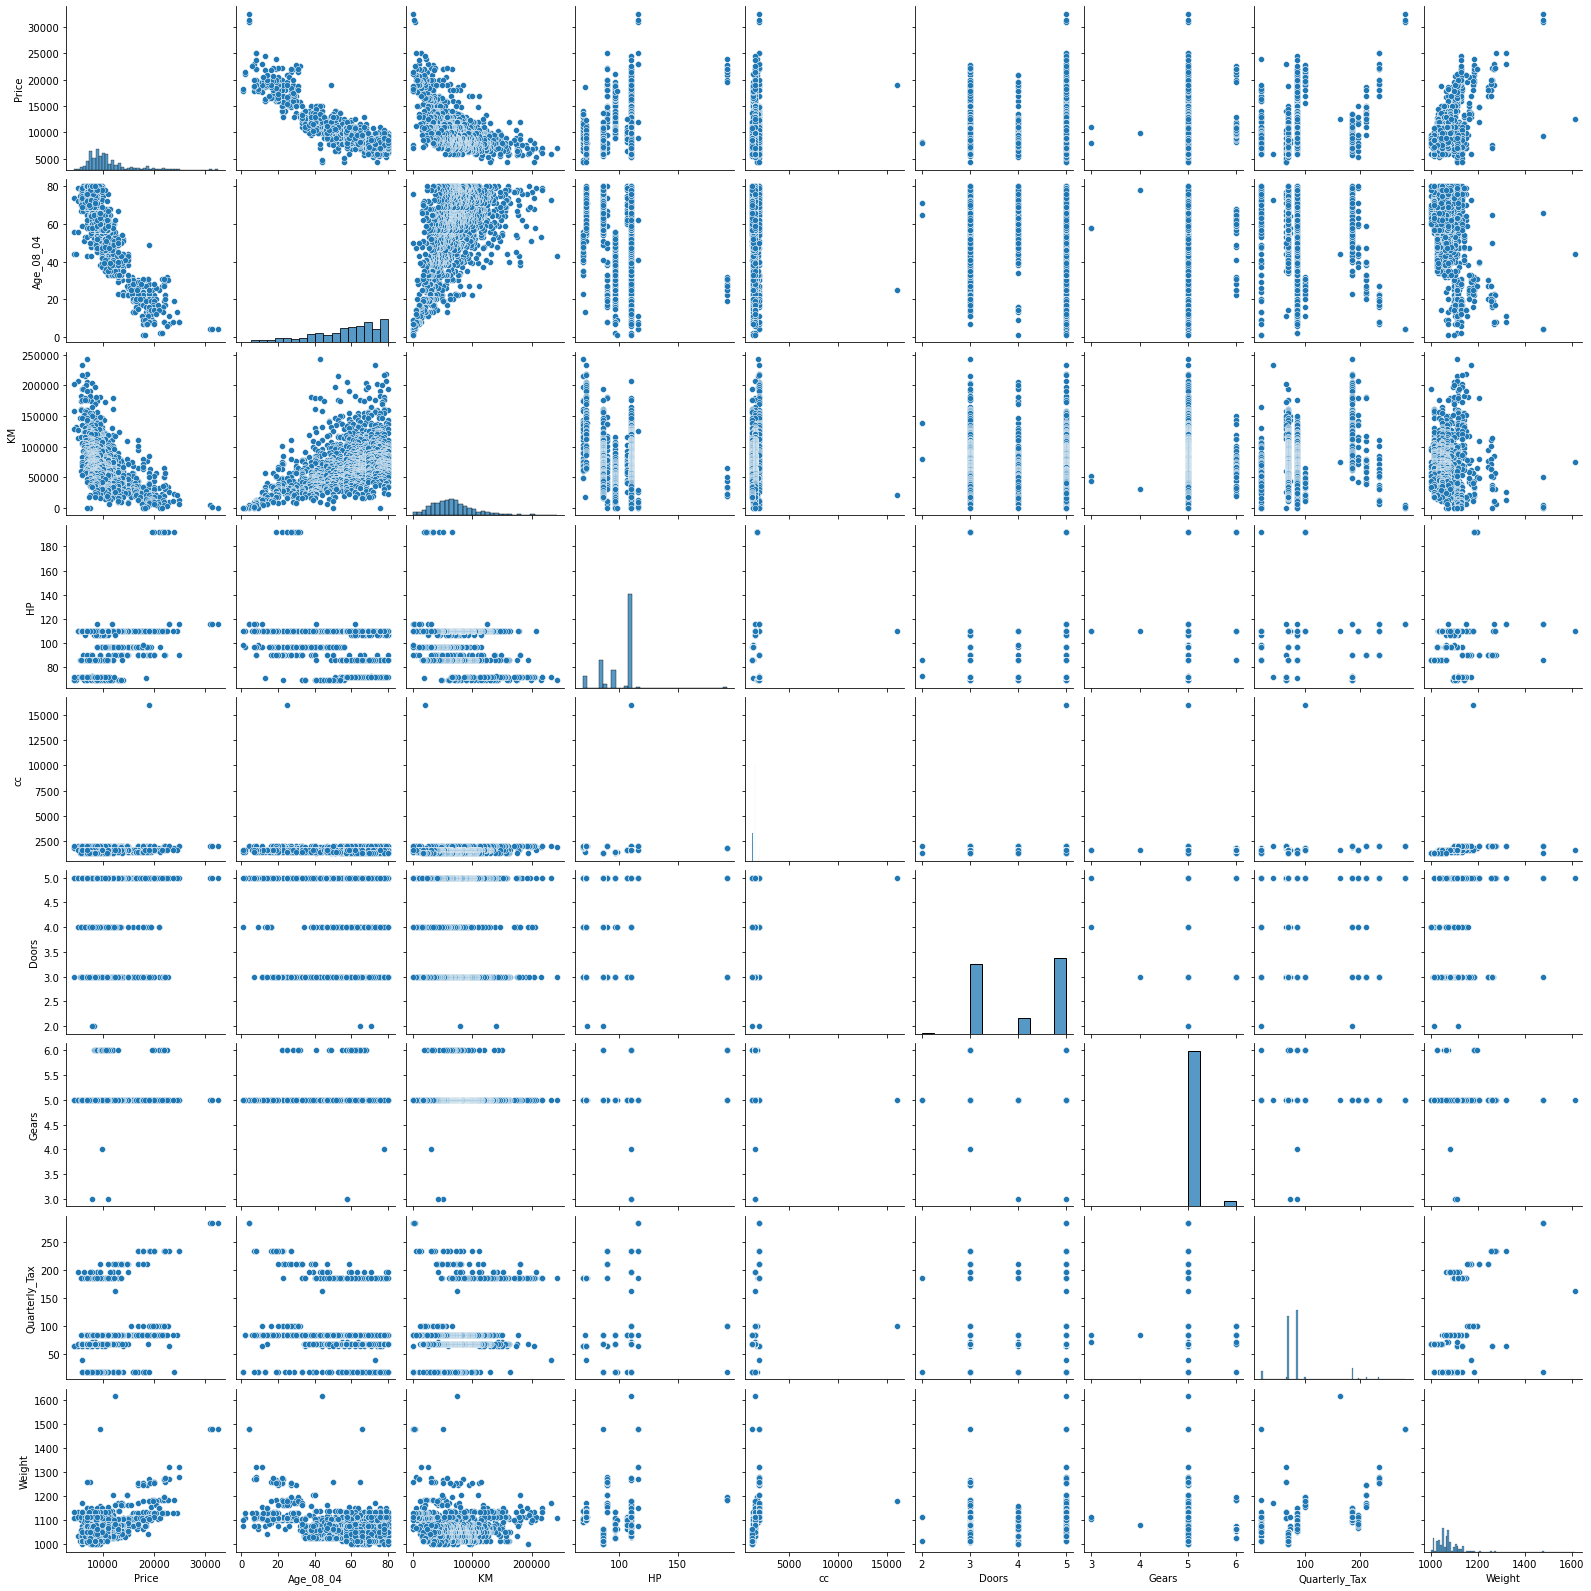

In [9]:
sns.pairplot(data = df)

In [10]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


Here we see a moderately high correlation between features (Quarterly_Tax and Weight)
Using VIF metrics to determine the correlation accurately

In [11]:
vif = []
df_vif = pd.DataFrame()
mlr_age=smf.ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df).fit()
vif.append(1/(1-mlr_age.rsquared))
mlr_km=smf.ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df).fit()
vif.append(1/(1-mlr_km.rsquared))
mlr_hp=smf.ols("HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data = df).fit()
vif.append(1/(1-mlr_hp.rsquared))
mlr_cc=smf.ols("cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data = df).fit()
vif.append(1/(1-mlr_cc.rsquared))
mlr_doors=smf.ols("Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data = df).fit()
vif.append(1/(1-mlr_doors.rsquared))
mlr_gears=smf.ols("Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight",data = df).fit()
vif.append(1/(1-mlr_gears.rsquared))
mlr_qtrtax=smf.ols("Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight",data = df).fit()
vif.append(1/(1-mlr_qtrtax.rsquared))
mlr_wt=smf.ols("Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax",data = df).fit()
vif.append(1/(1-mlr_wt.rsquared))
df_vif["Features"]=colsTaken[1:]
df_vif["VIF"]= vif
df_vif

,Features,VIF
0,Age_08_04,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


From the above metrics we see that since none of features breach the cutoff of 500, hence the features are independant of each other

# Creating the model
To predict Price(y) given x1(Age_08_04), x2(KM), x3(HP), x4(cc), x5(Doors), x6(Gears), x7(Quarterly_Tax), x8(Weight)

In [12]:
mlr = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df).fit() 

In [13]:
mlr.rsquared

0.8625200256947

In [14]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:22:44   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Check if errors belong to normal distributions

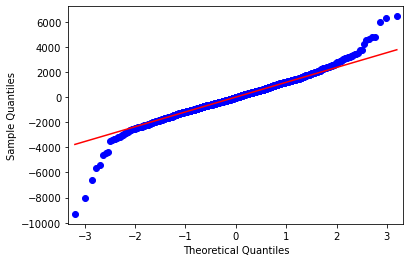

In [18]:
qplot=sm.qqplot(data=mlr.resid,line='q')

From qqplot we see only a small deviation from reference line, hence we can conclude that the errors belong to normal distributions

# Check if errors belong to normal distributions of constant variance and are independant of each other

In [20]:
def get_standardized_data(data):
    data= (data-np.mean(data))/np.std(data)
    return data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ε vs fitted values')

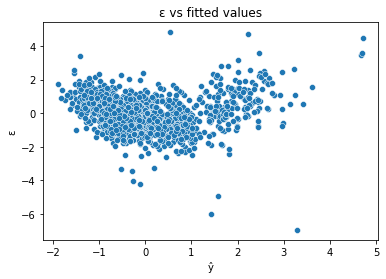

In [26]:
sns.scatterplot(get_standardized_data(mlr.fittedvalues),get_standardized_data(mlr.resid))
plt.xlabel("ŷ")
plt.ylabel("ε")
plt.title("ε vs fitted values")

Text(0.5, 1.0, 'ε vs index')

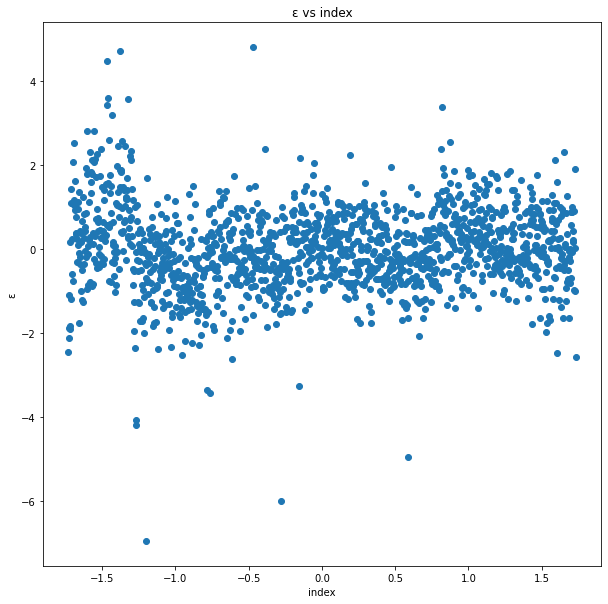

In [39]:
x_axis = []
for i in range(0,df["Price"].count()):
    x_axis.append(i)
plt.figure(figsize=(10,10))
plt.scatter(get_standardized_data(x_axis),get_standardized_data(mlr.resid))
plt.xlabel("index")
plt.ylabel("ε")
plt.title("ε vs index")

From both graphs since there is no pattern, we see that ε are independant and belonging to normal distributions of constant variance

# Check if parameters are linear in nature

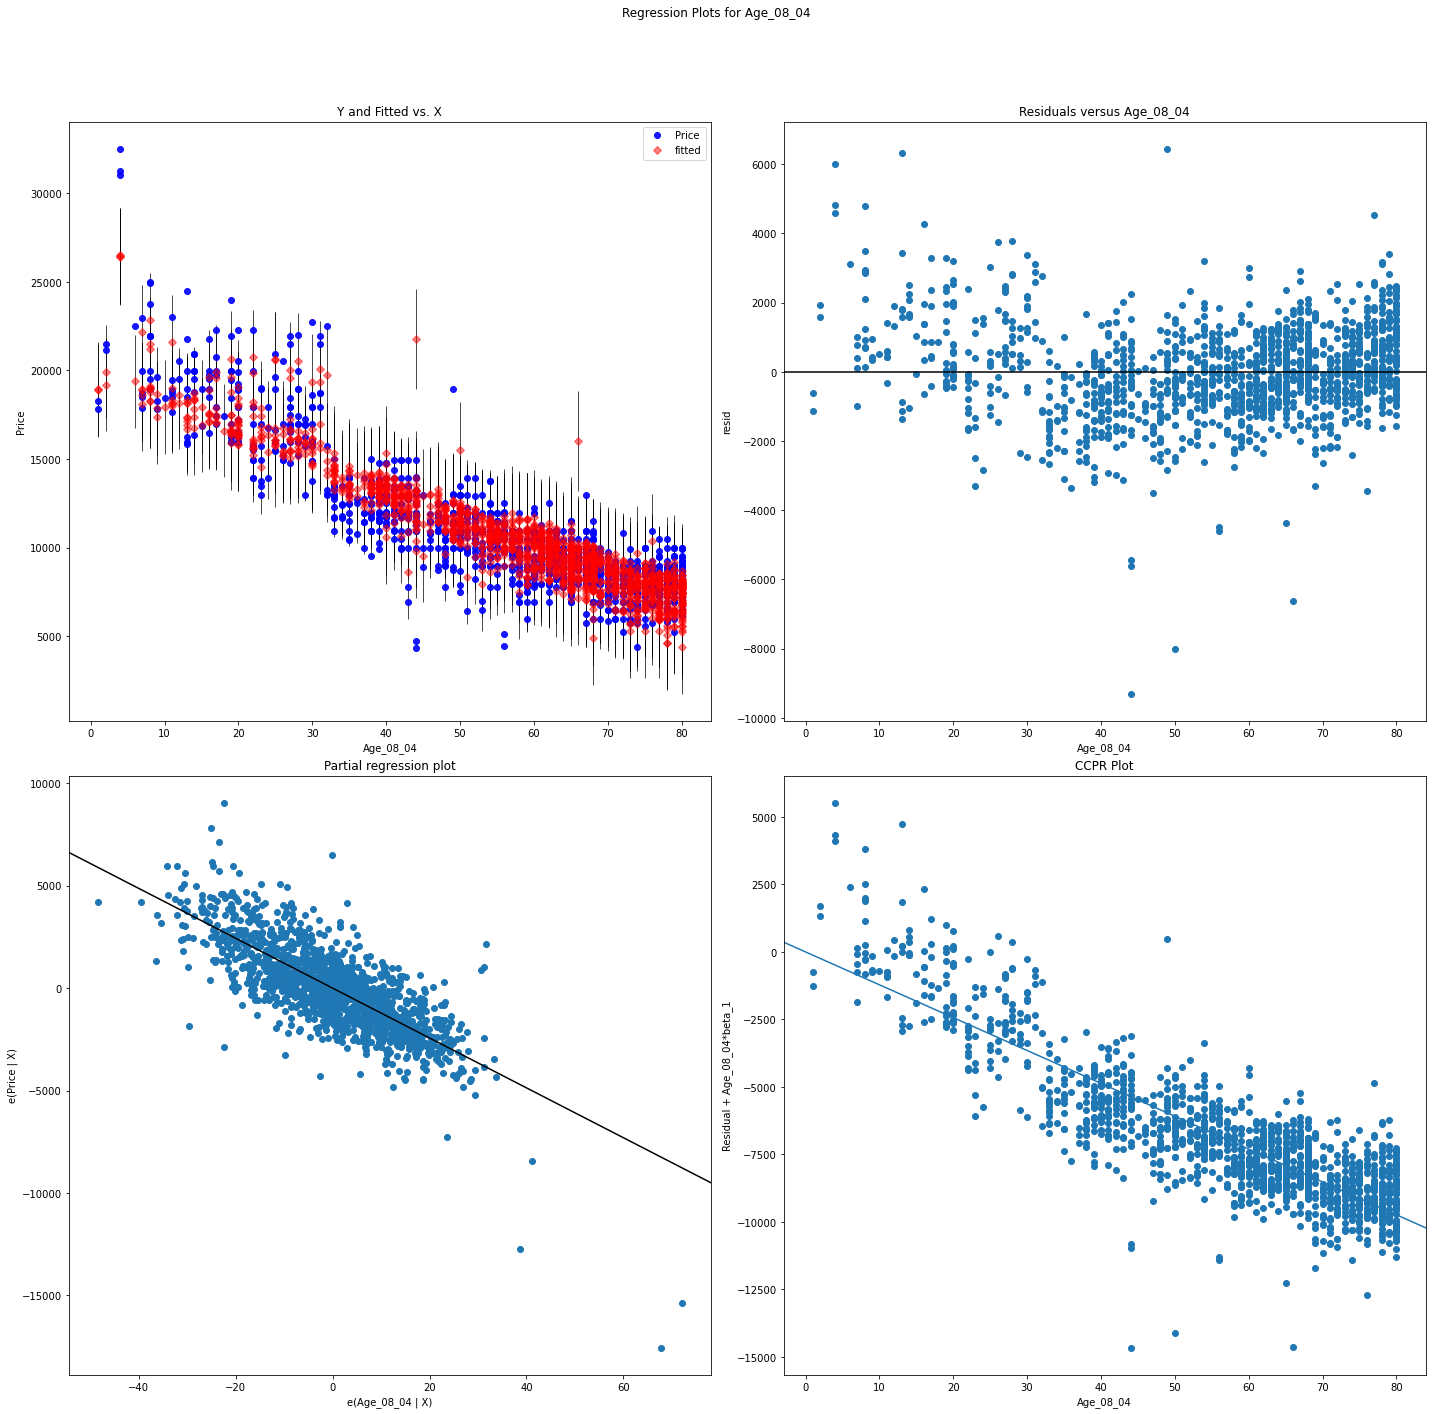

In [45]:
fig = plt.figure(figsize=(20,20))
prplot=smg.plot_regress_exog(mlr,"Age_08_04",fig=fig)

Here we see that Age_08_04 and y values are correlated from partial regression plot. Also we see that Age_08_04 is independant of the errors. 

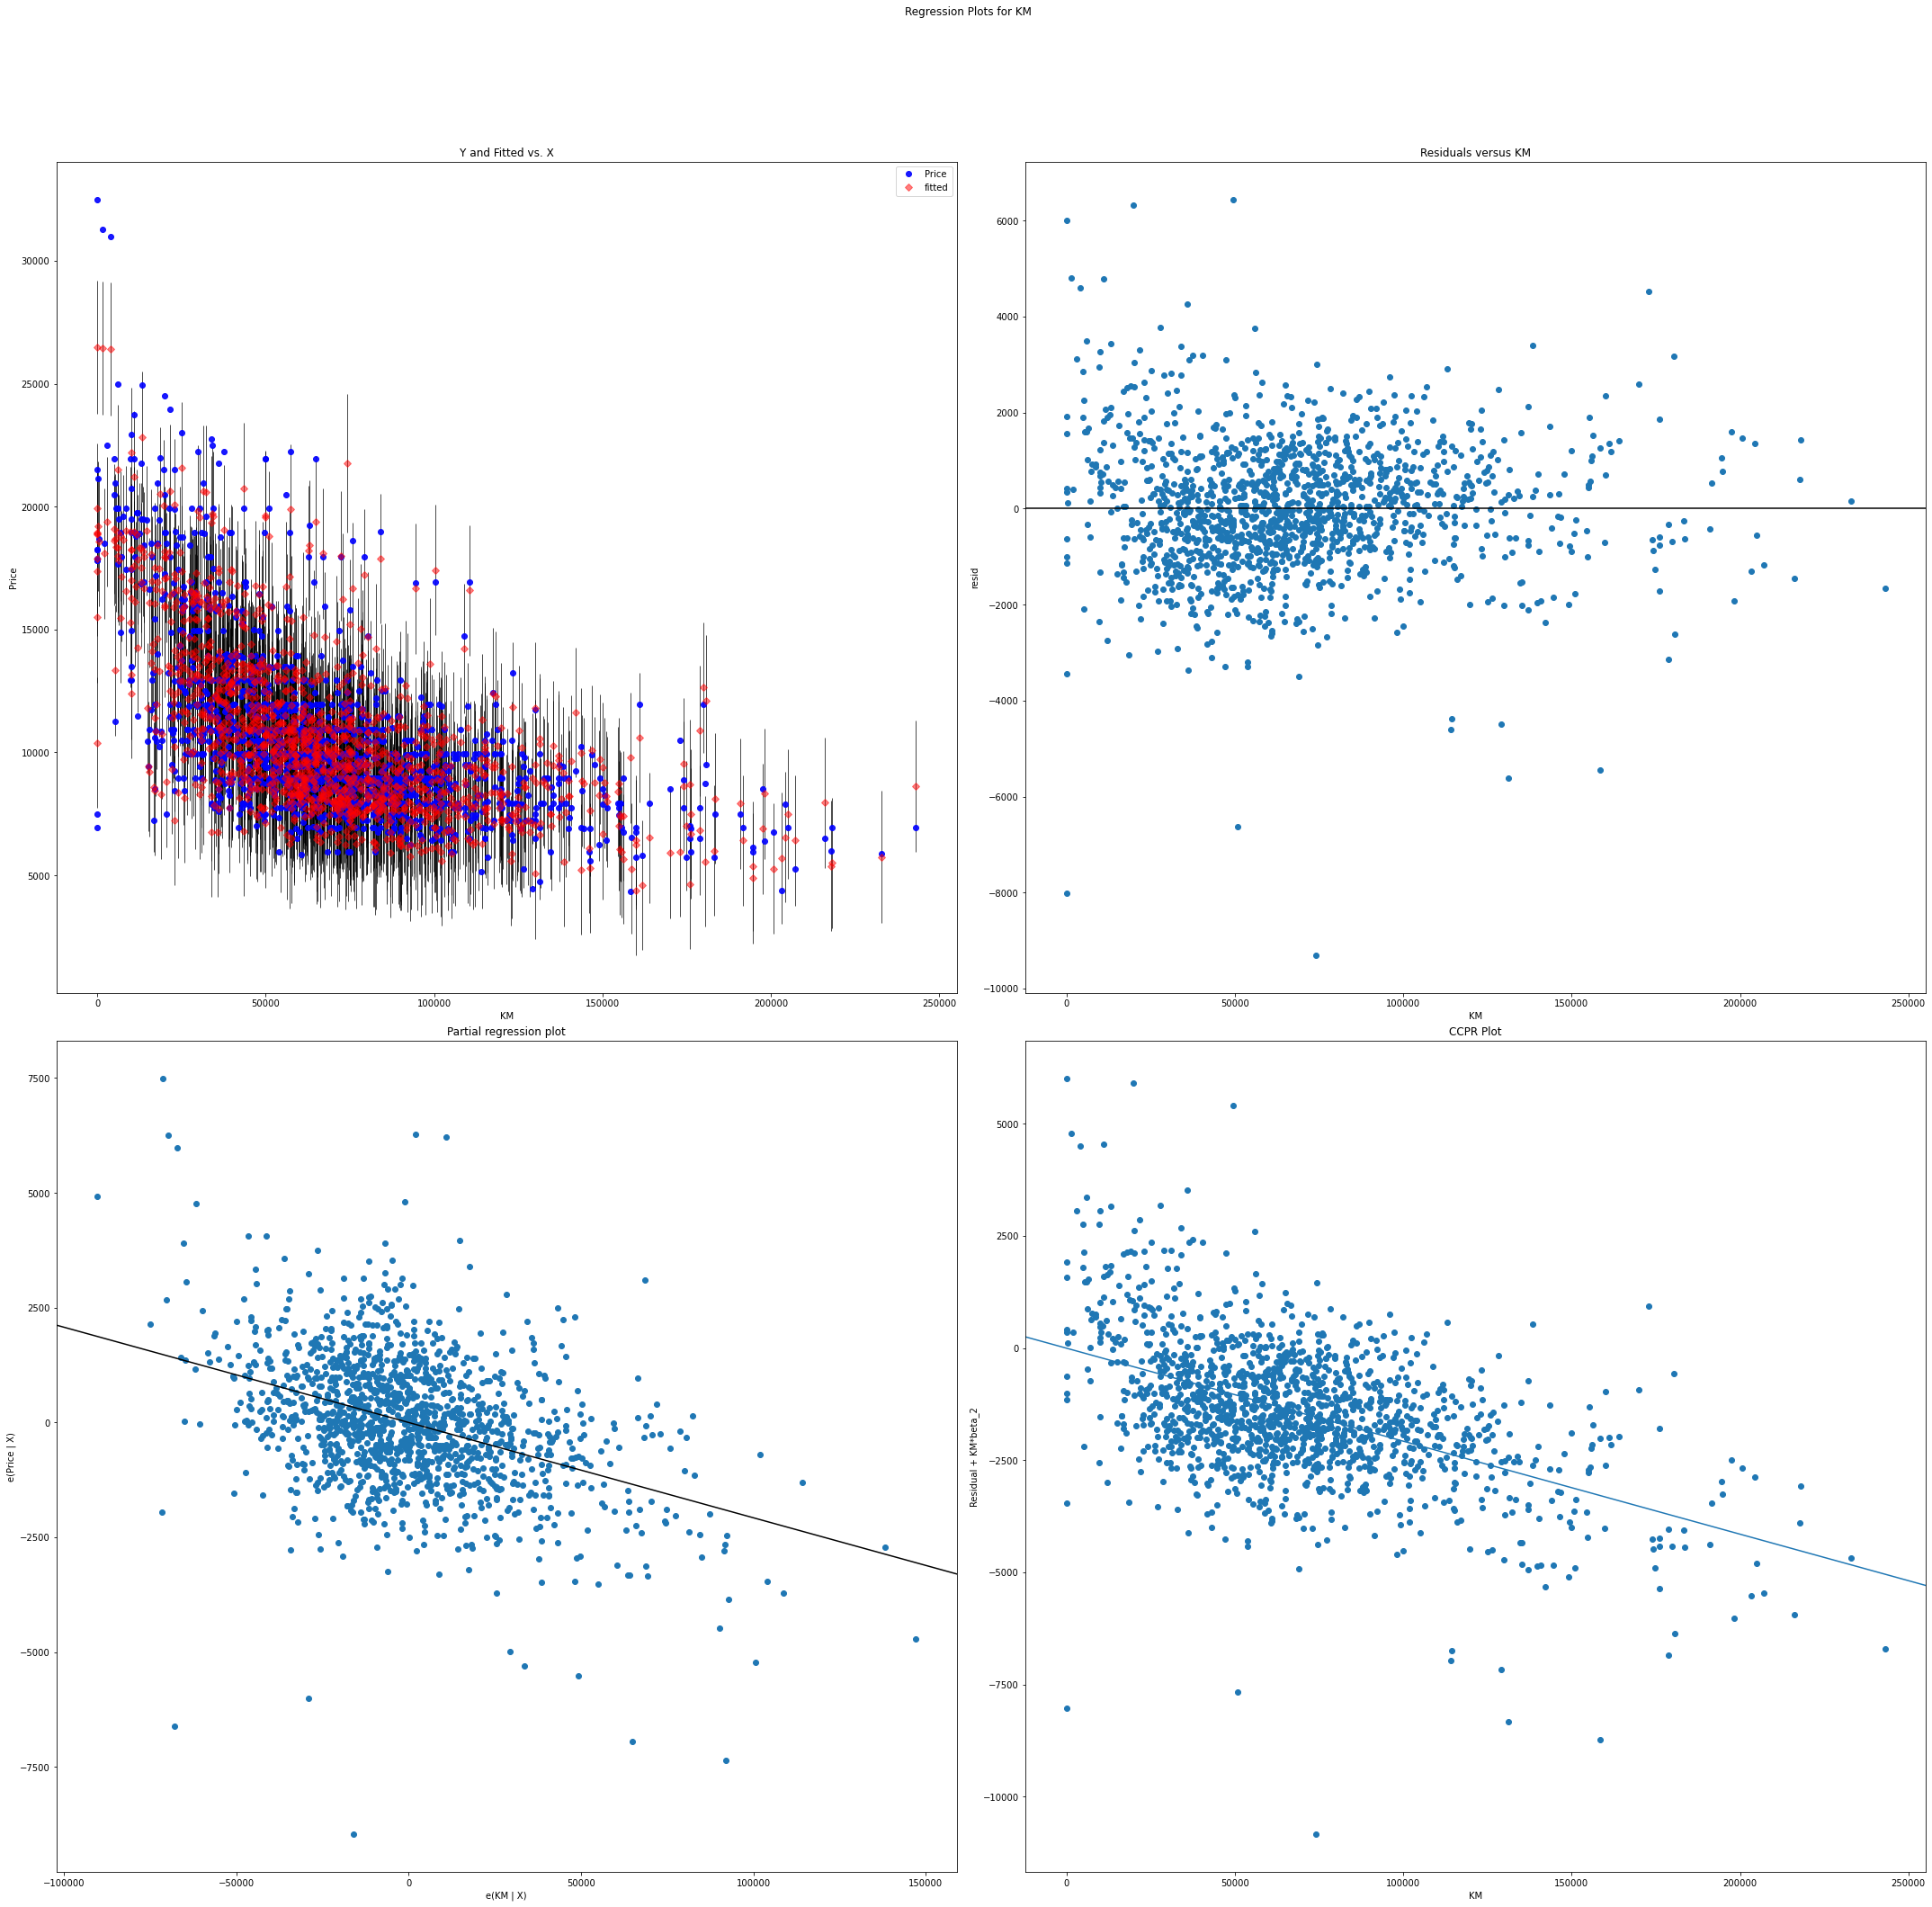

In [48]:
fig = plt.figure(figsize=(30,30))
prplot=smg.plot_regress_exog(mlr,"KM",fig=fig)

Here we see that KM and y values are correlated from partial regression plot. Also we see that KM is independant of the errors. 

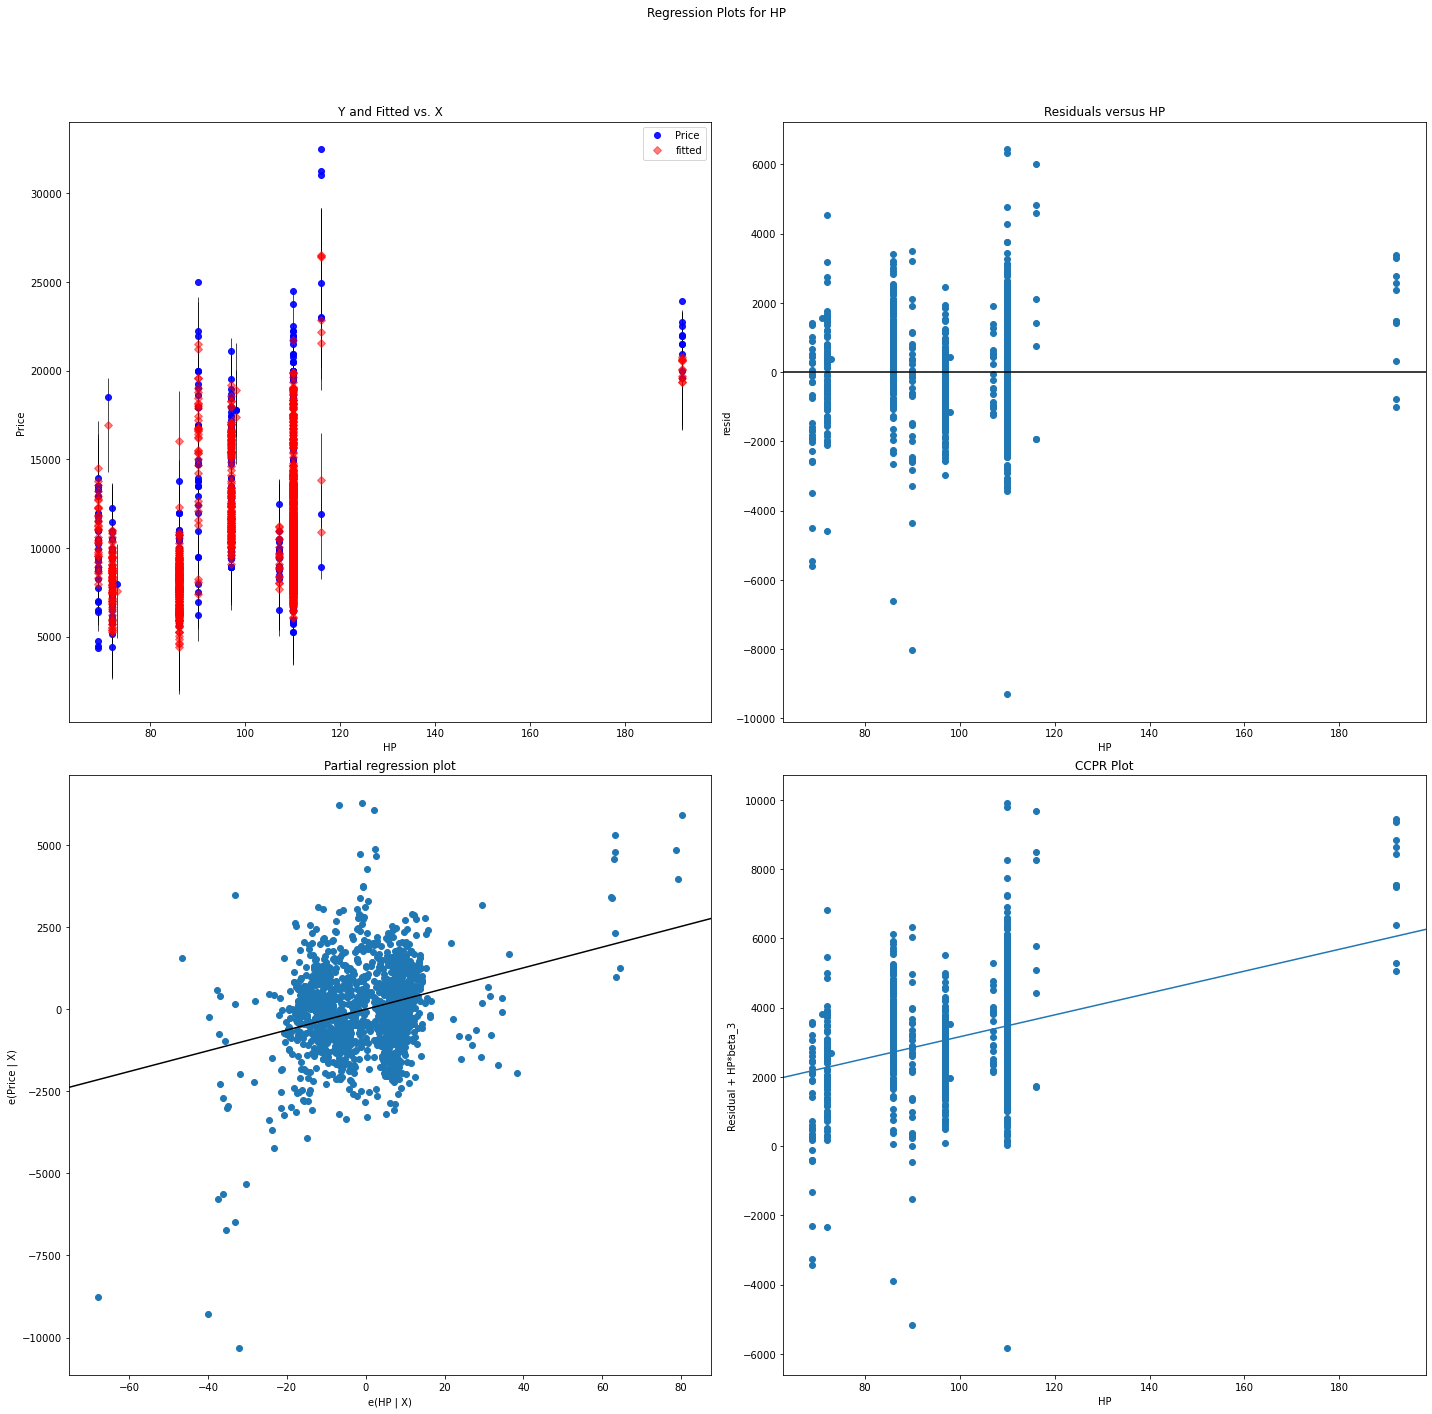

In [56]:
fig = plt.figure(figsize=(20,20))
prplot=smg.plot_regress_exog(mlr,"HP",fig=fig)

Here we see that KM and y values are correlated from partial regression plot. Also we see that HP is independant of the errors. 

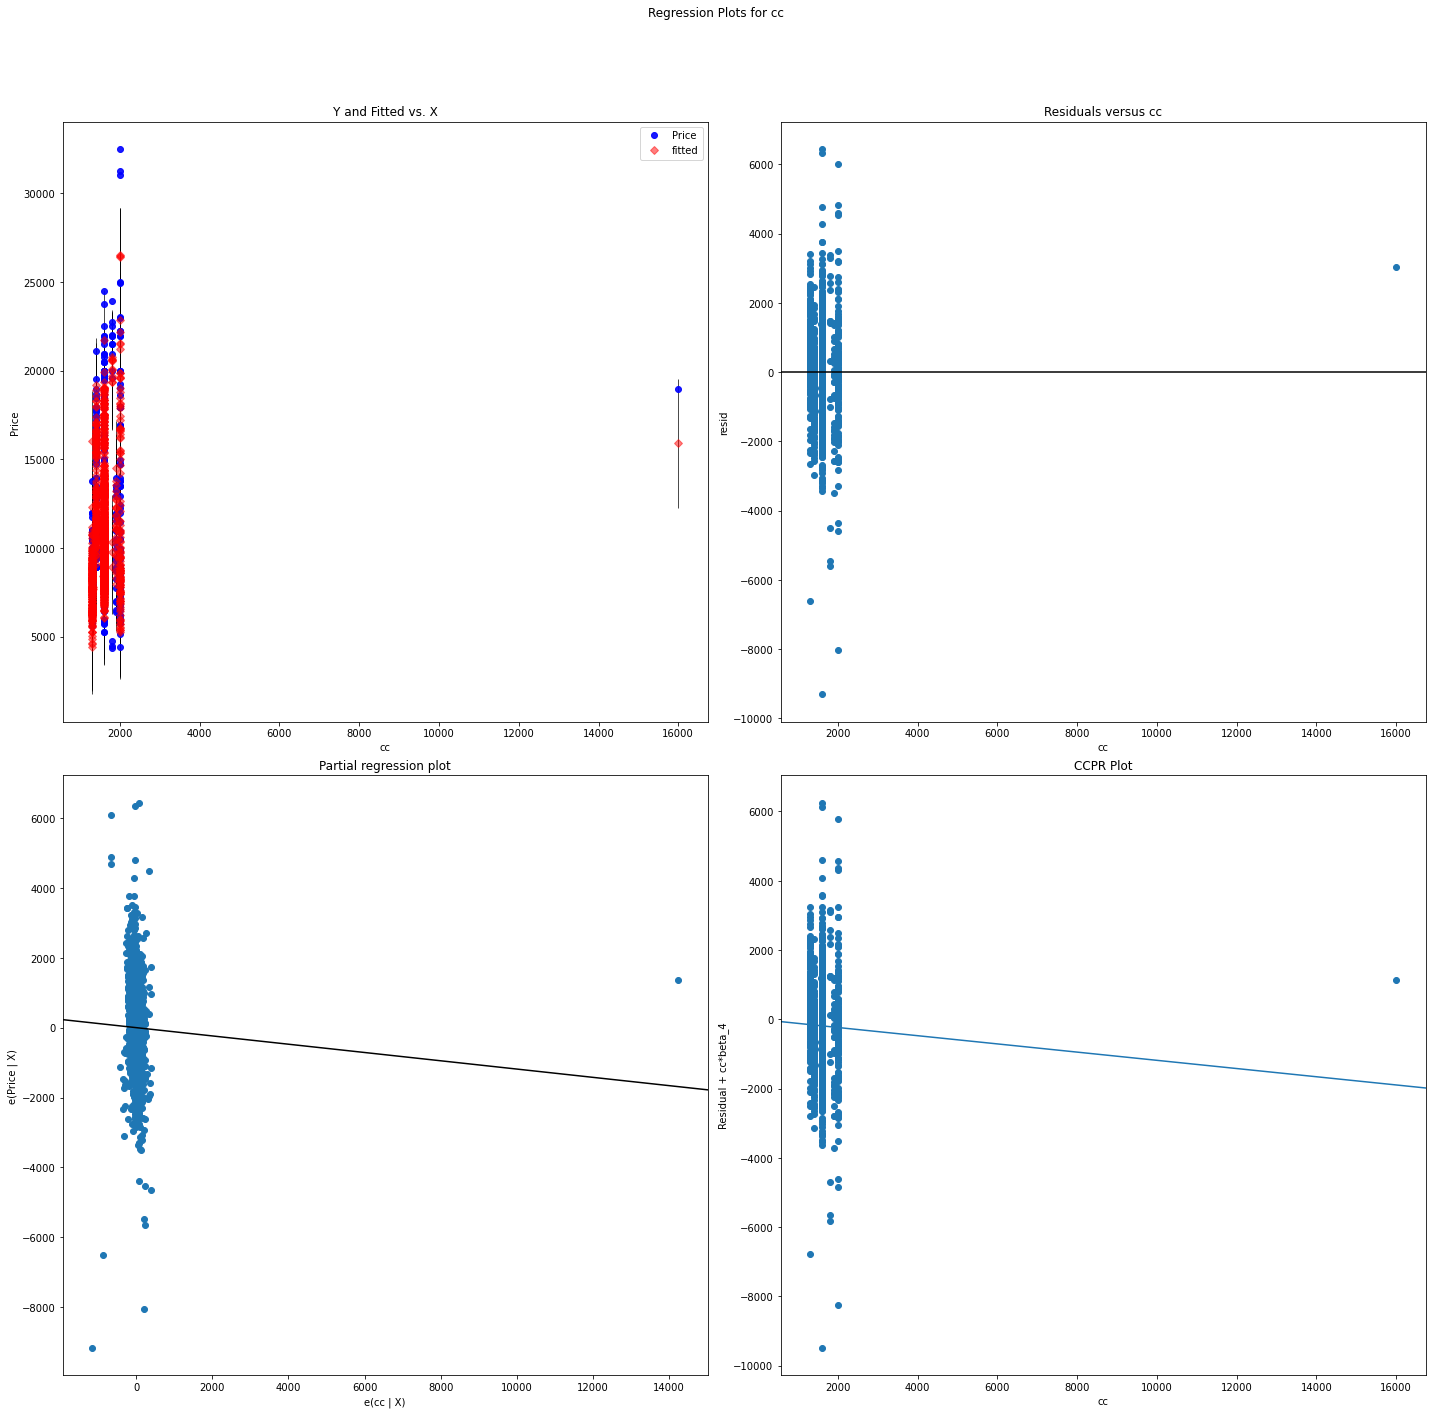

In [57]:
fig = plt.figure(figsize=(20,20))
prplot=smg.plot_regress_exog(mlr,"cc",fig=fig)

Here we see that cc and y values are correlated from partial regression plot. Also we see that cc is independant of the errors. 

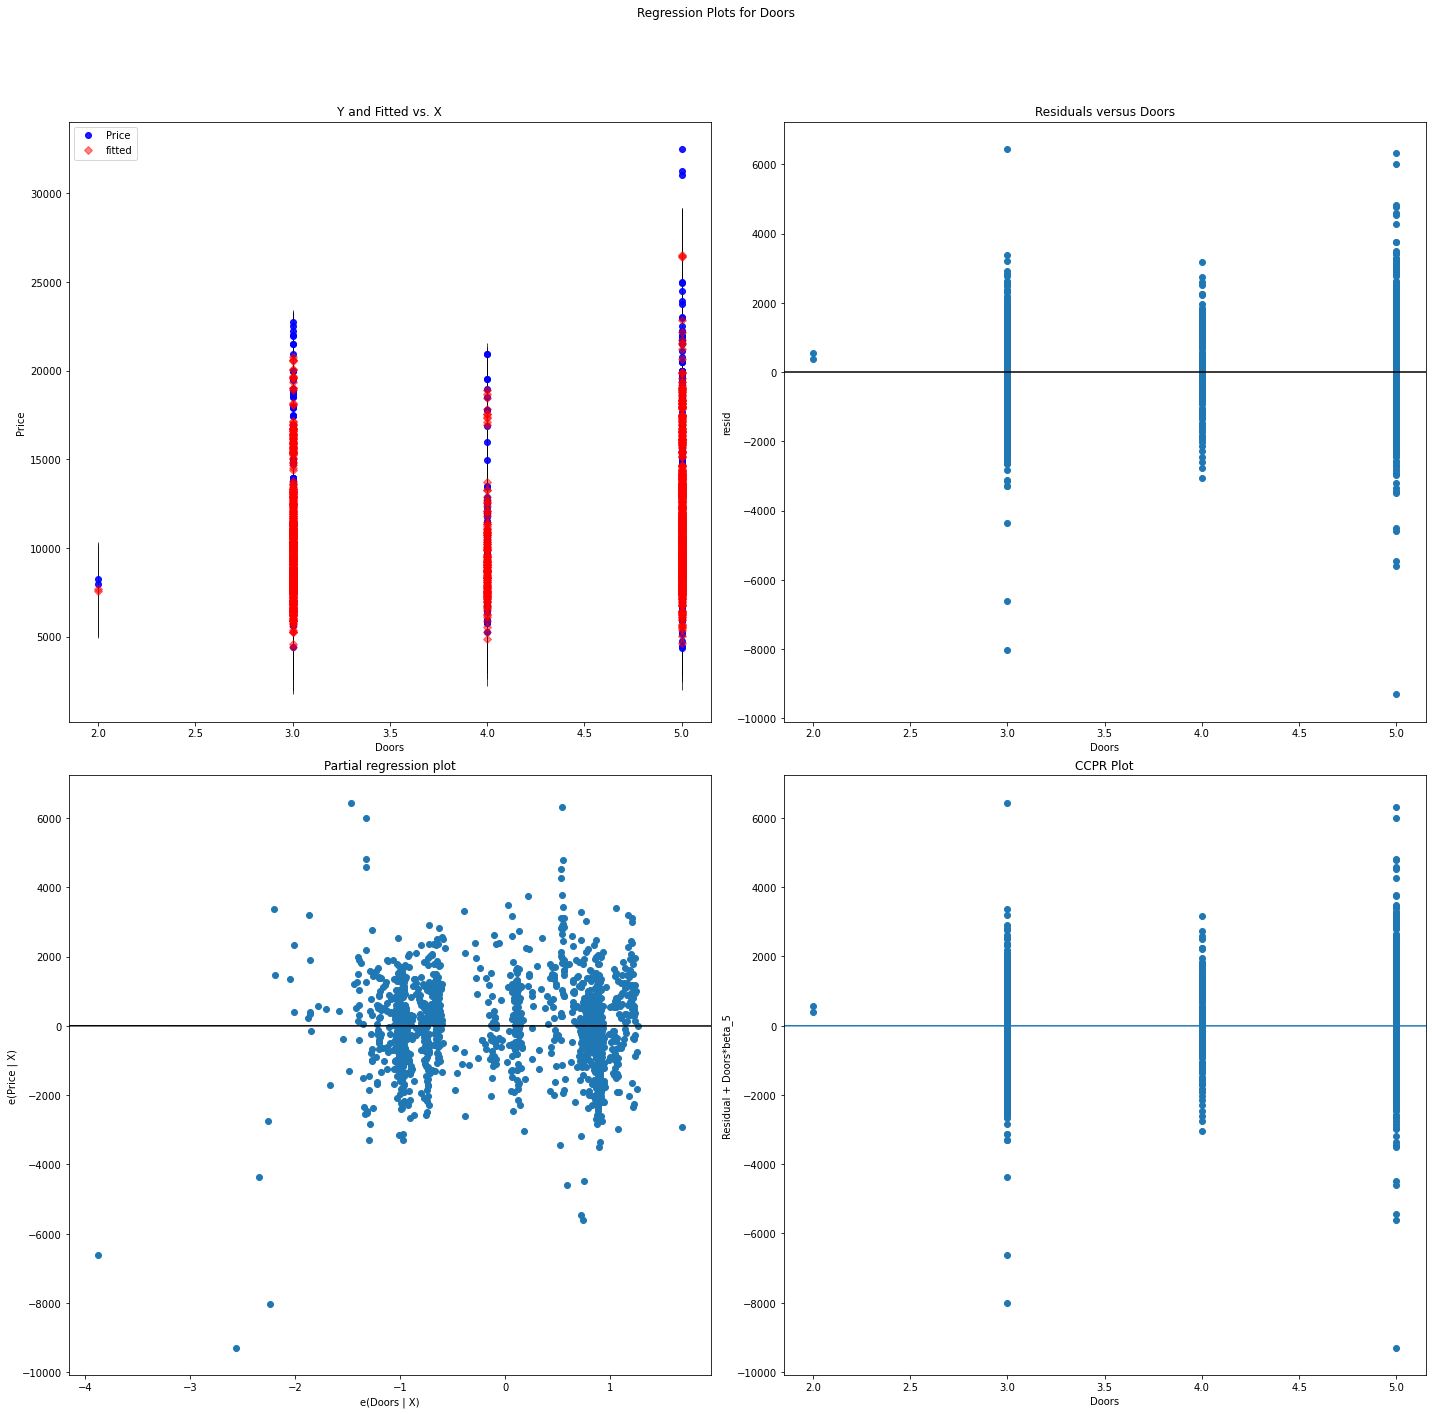

In [60]:
fig = plt.figure(figsize=(20,20))
prplot=smg.plot_regress_exog(mlr,"Doors",fig=fig)

Here we see that Doors and y values are not correlated but neither do we see a non linear relation(curved pattern) from partial regression plot. Also we see that Doors is independant of the errors. 

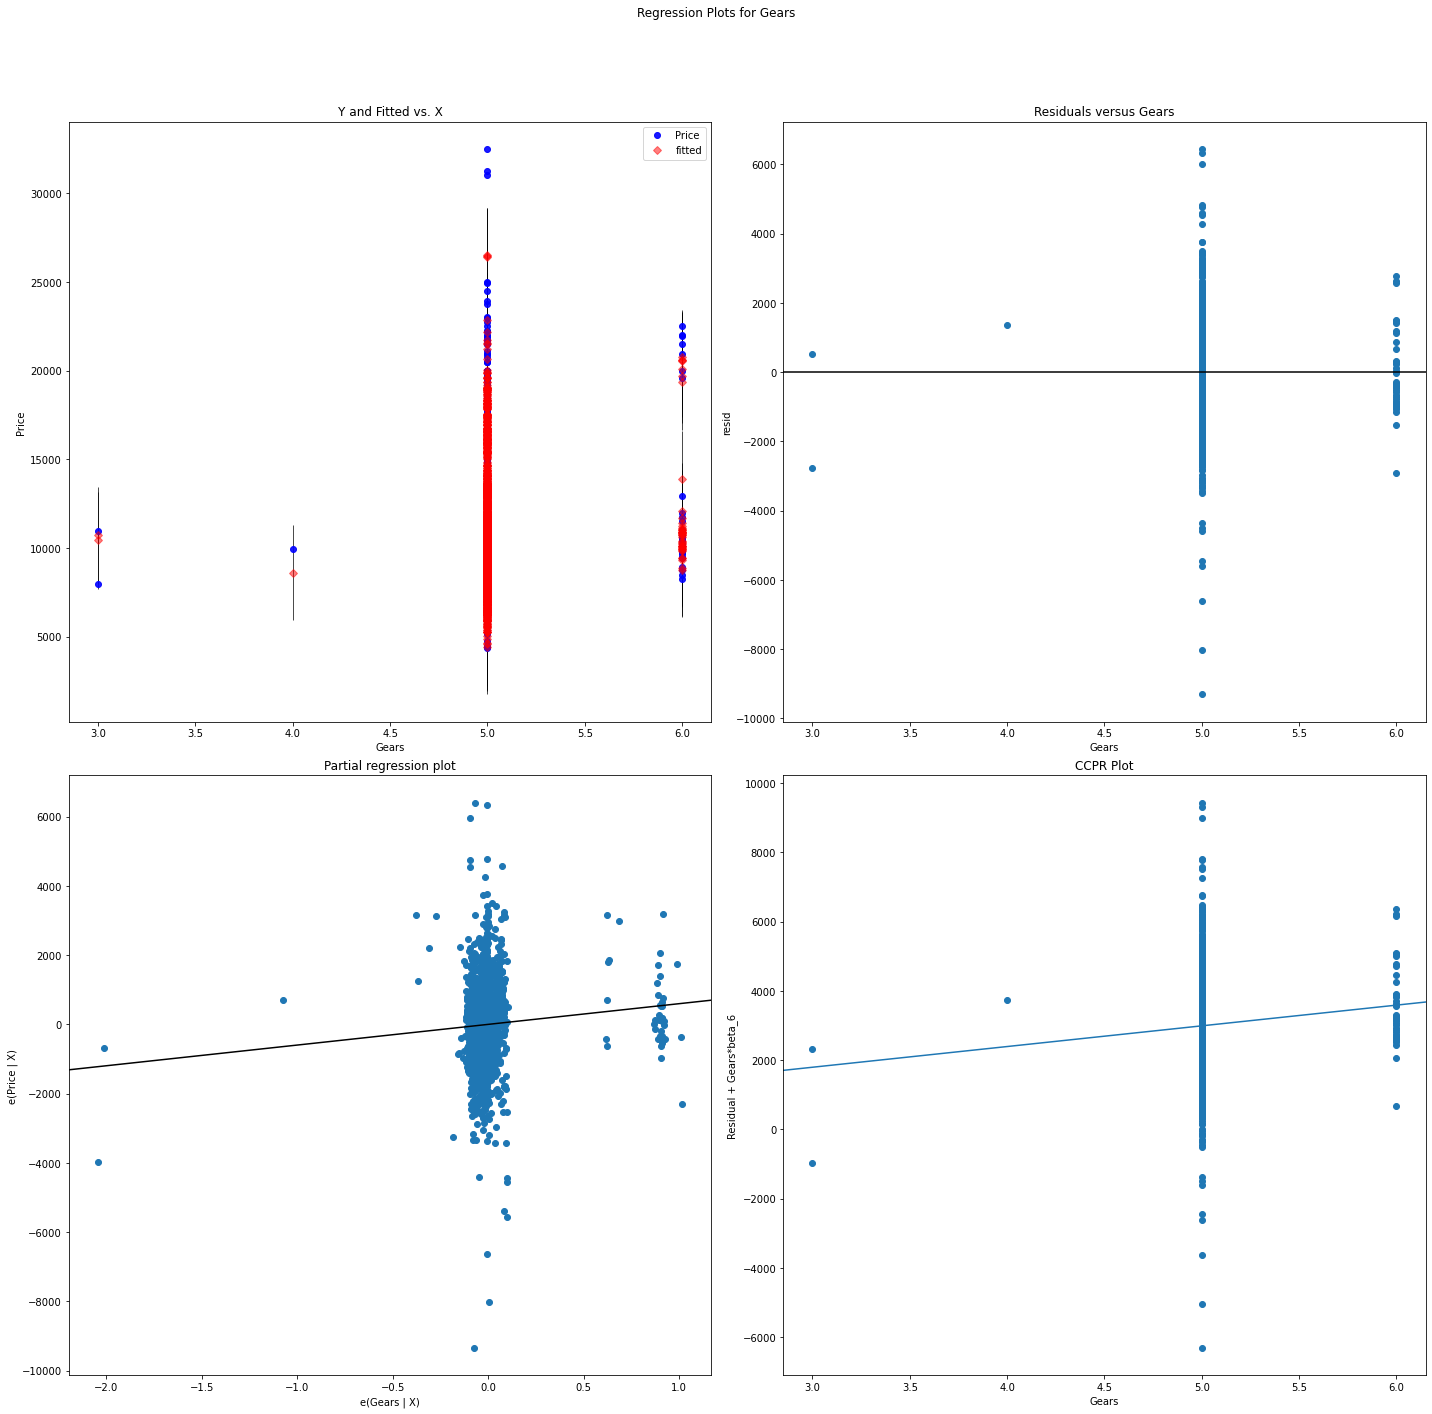

In [61]:
fig = plt.figure(figsize=(20,20))
prplot=smg.plot_regress_exog(mlr,"Gears",fig=fig)

Here we see that Gears and y values are correlated from partial regression plot. Also we see that Gears is independant of the errors. 

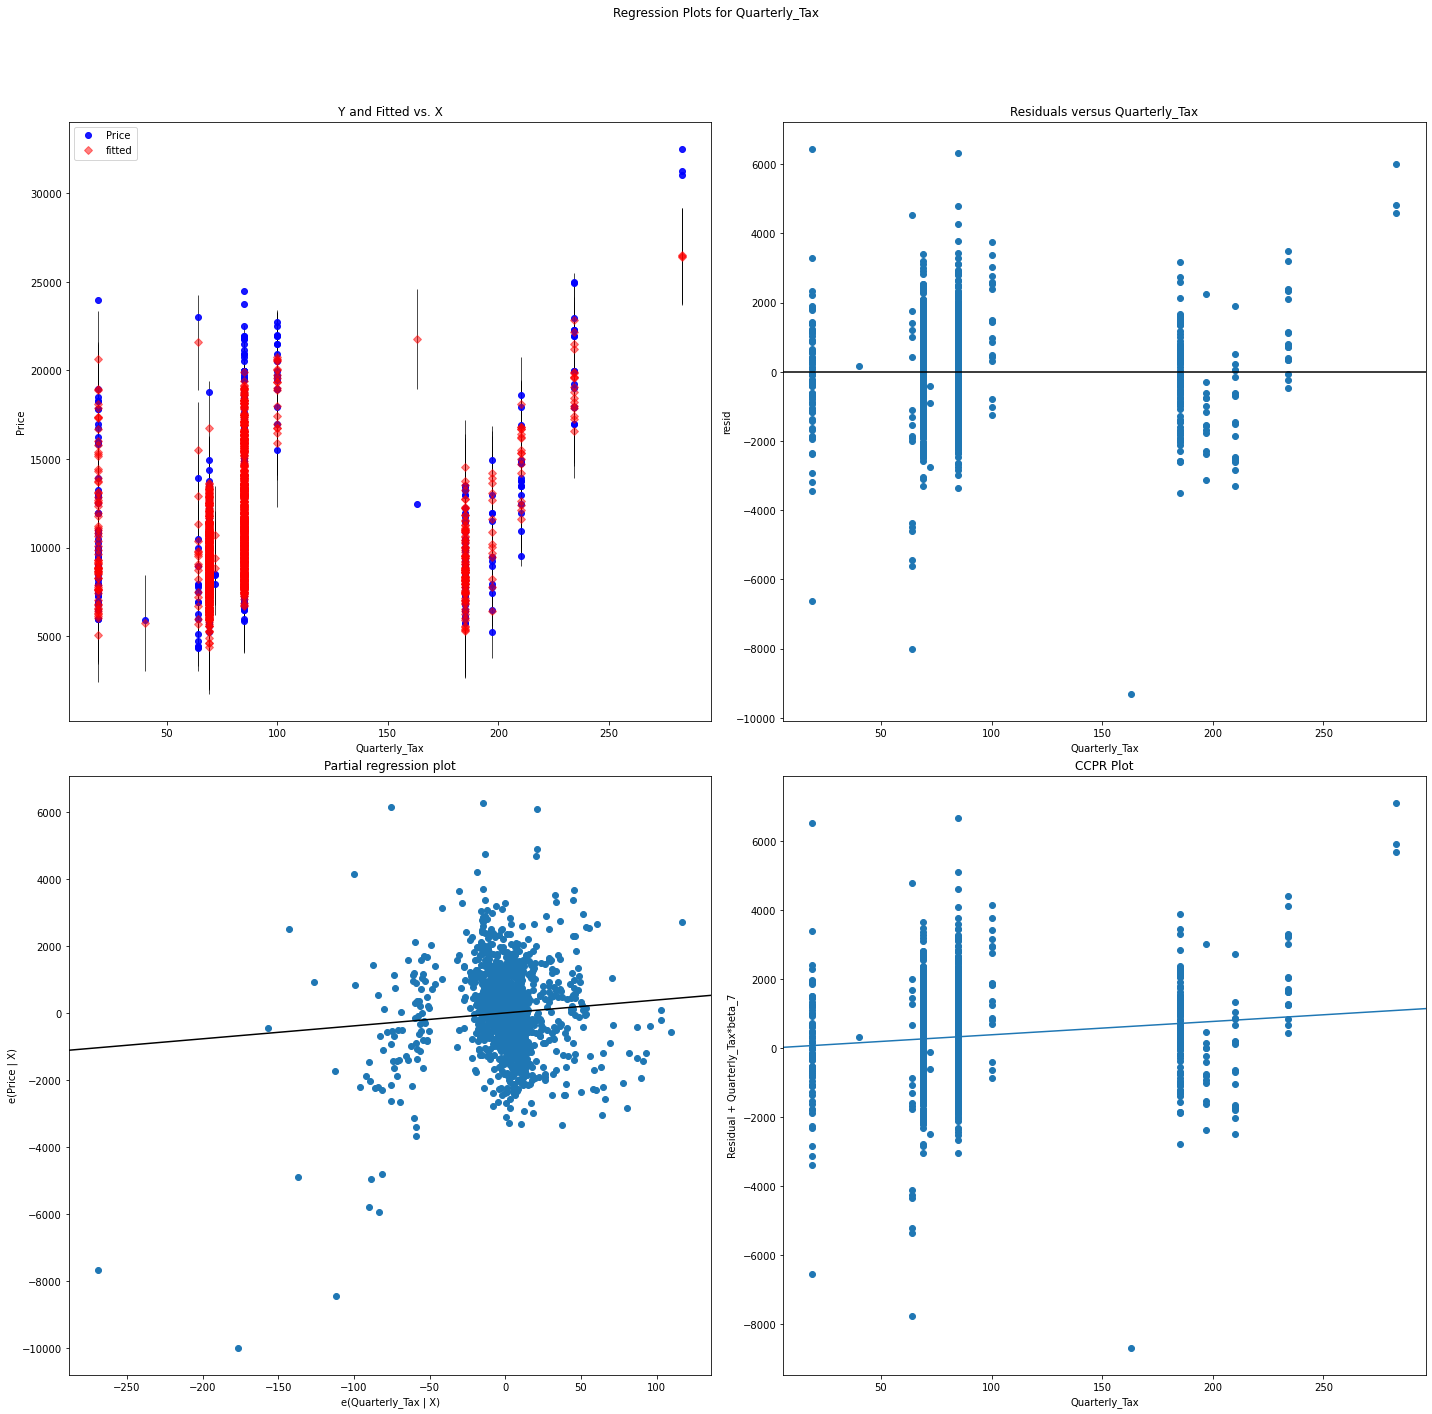

In [63]:
fig = plt.figure(figsize=(20,20))
prplot=smg.plot_regress_exog(mlr,"Quarterly_Tax",fig=fig)

Here we see that Quarterly_Tax and y values are correlated from partial regression plot. Also we see that Quarterly_Tax is independant of the errors. 

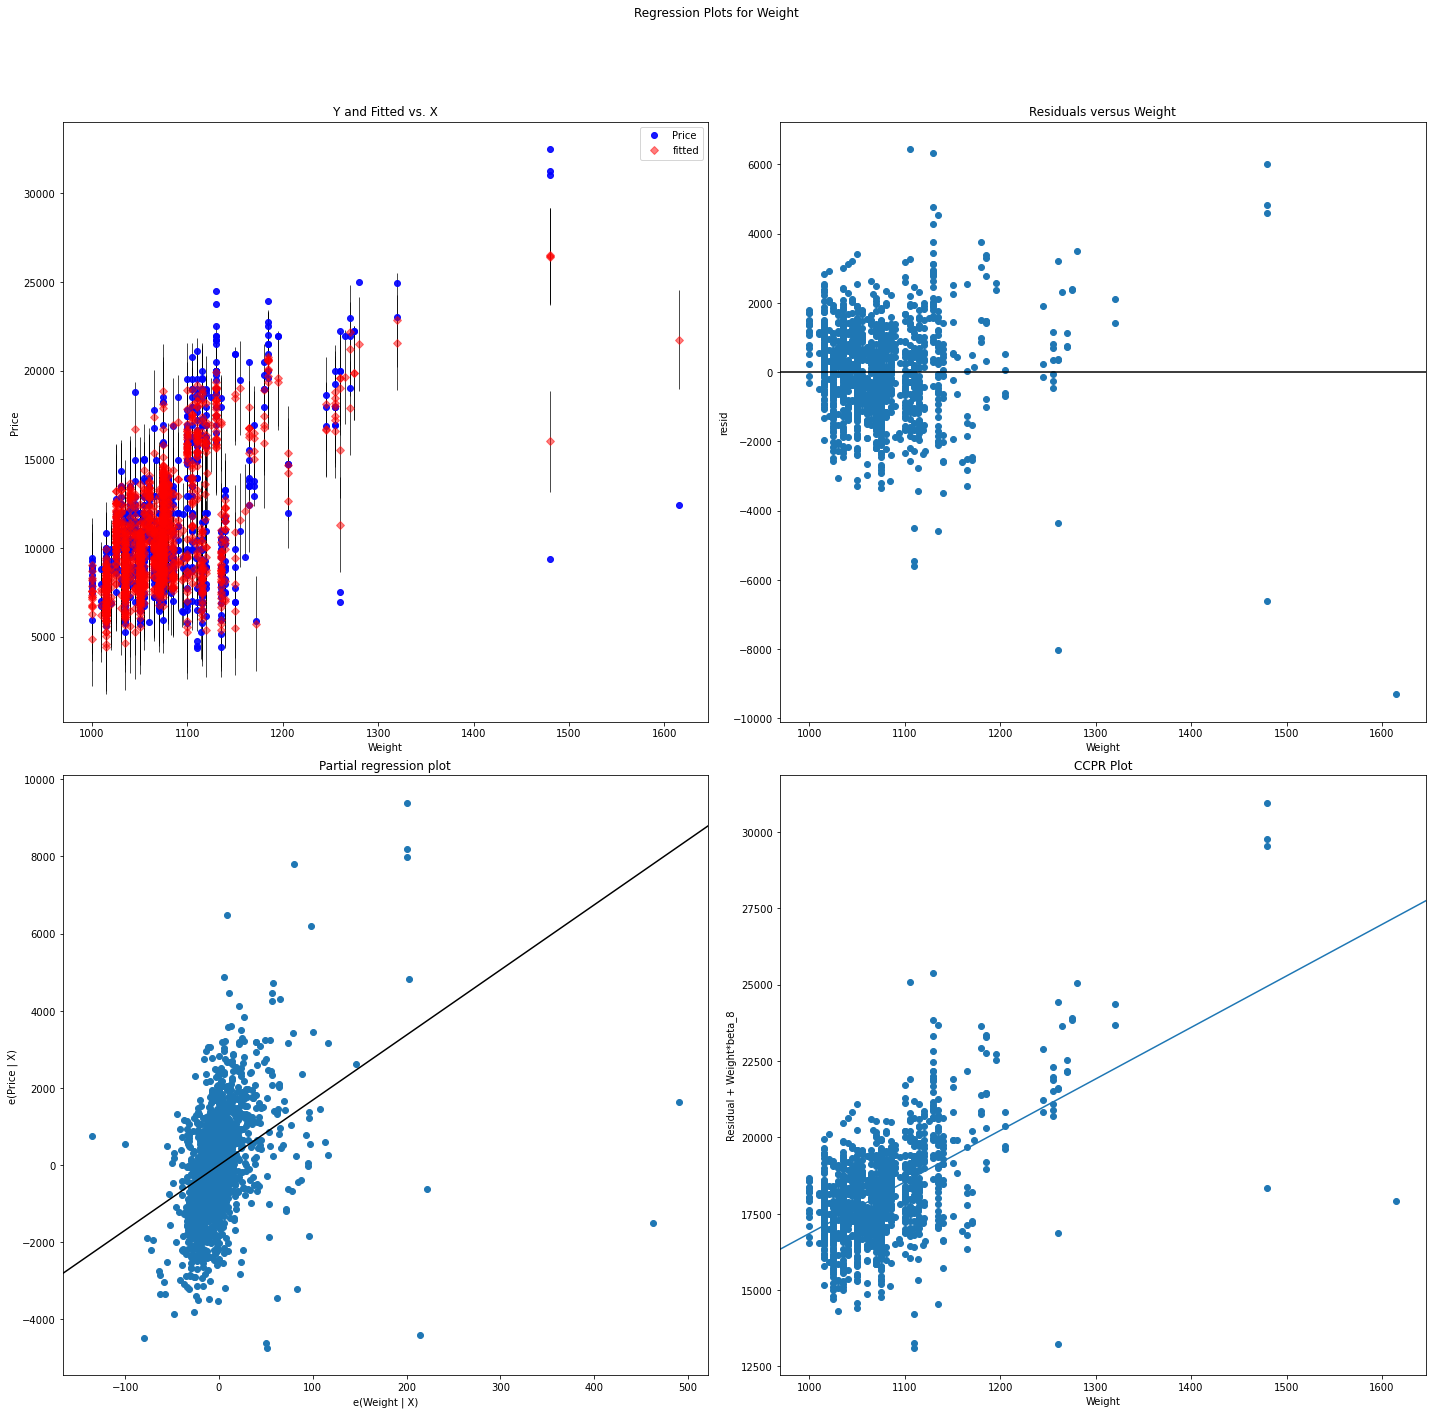

In [64]:
fig = plt.figure(figsize=(20,20))
prplot=smg.plot_regress_exog(mlr,"Weight",fig=fig)

Here we see that Weight and y values are correlated from partial regression plot. Also we see that Weight is independant of the errors. 

# Checking for outliers

<StemContainer object of 3 artists>

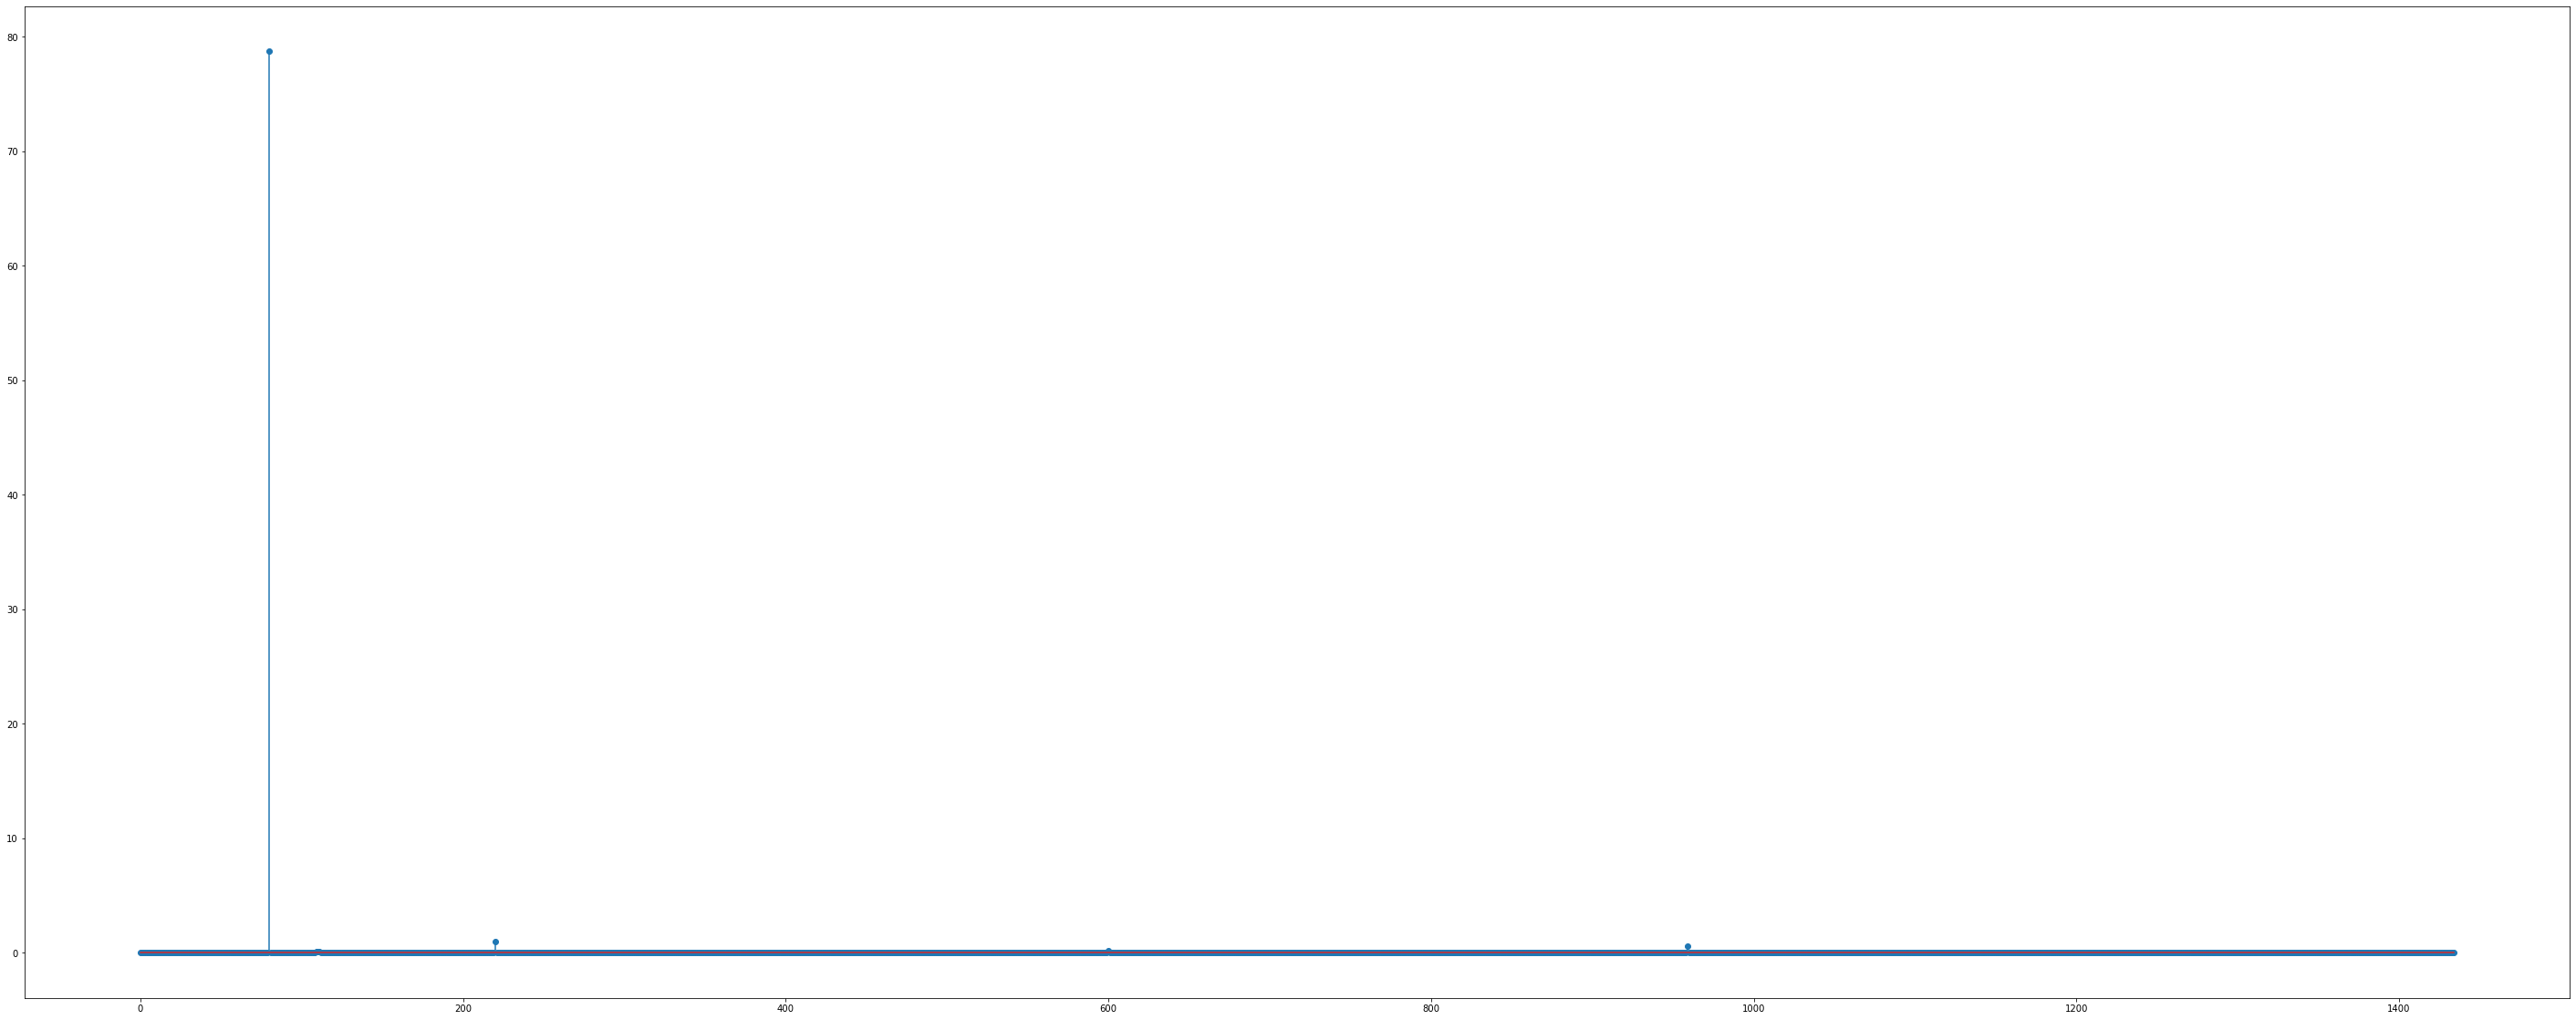

In [428]:
inf = mlr.get_influence()
inf_cd,_=inf.cooks_distance
x_axis = []
for i in range(0,mlr.resid.count()):
    x_axis.append(i)
plt.figure(figsize=(50,20))
plt.stem(x_axis,np.round(inf_cd,2))

In [429]:
cutoff = 3*(8+1)/1435
cutoff

0.018815331010452963

# Optimising the model

In [435]:
count = 0
x_axis1 = []
for val in inf_cd:
    if val>cutoff:
        x_axis1.append(count)
    count = count+1
x_axis1
# List of data points breaching the cutoff

[14,
 16,
 49,
 80,
 109,
 110,
 111,
 140,
 190,
 191,
 220,
 522,
 600,
 653,
 959,
 990,
 1057]

In [431]:
#Sorting the influence points
temp = sorted(inf_cd)

In [432]:
#Dropping the entire outlier as such
df_modified = df.drop(index=x_axis1,axis=0)

In [433]:
mlr_new=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df_modified).fit() 

In [434]:
#Here we see that the R^2 dips from initial model which is not acceptable 
mlr_new.rsquared

0.8614519196687279

In [422]:
vif_df = pd.DataFrame()

In [426]:
# Dropping each outlier point one by one in descending order of influence measuring the R^2 value
x_axis = []
i=-1
rsq=[]
col_dropped = []
for j in range(0,17):
    count=0
    for val in inf_cd:
        if val==temp[i:][0]:
            x_axis.append(count)
            col_dropped.append(list(x_axis))
            df_modified1 = []
            df_modified1= df.drop(index=x_axis,axis=0)
            mlr1 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df_modified1).fit()
            rsq.append(mlr1.rsquared)
            i=i-1
            break
        count=count+1
vif_df["Cols dropped"] = col_dropped
vif_df["r^2"]=rsq


In [427]:
#Here we see that R^2 starts decreasing after dropping first 4 highest influence points
vif_df

,Cols dropped,r^2
0,[80],0.868116
1,"[80, 220]",0.868118
2,"[80, 220, 959]",0.868247
3,"[80, 220, 959, 600]",0.868435
4,"[80, 220, 959, 600, 109]",0.866412
5,"[80, 220, 959, 600, 109, 111]",0.864208
6,"[80, 220, 959, 600, 109, 111, 110]",0.862017
7,"[80, 220, 959, 600, 109, 111, 110, 990]",0.862024
8,"[80, 220, 959, 600, 109, 111, 110, 990, 653]",0.862053
9,"[80, 220, 959, 600, 109, 111, 110, 990, 653, 190]",0.862169


In [442]:
x_axis=[80, 220, 959,600]
df_modified1= df.drop(index=x_axis,axis=0)
mlr1 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df_modified1).fit()

In [446]:
np.round(mlr1.rsquared,4)

0.8684

In [444]:
mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1173.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:12:37   Log-Likelihood:                -12299.
No. Observations:                1431   AIC:                         2.462e+04
Df Residuals:                    1422   BIC:                         2.466e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6166.1848   1383.785     -4.456      0.000   -8880.664   -3451.705
Age_08_04      -120.4352      2.562    -47.005      0.000    -125.461    -115.409
KM               -0.0179      0.001    -14.001      0.000      -0.020      -0.015
HP               39.2860      2.912     13.493      0.000      33.575      44.997
cc               -2.4959      0.307     -8.120      0.000      -3.099      -1.893
Doors           -26.3516     39.270     -0.671      0.502    -103.384      50.681
Gears           524.2273    192.784      2.719      0.007     146.055     902.399
Quarterly_Tax     8.9695      1.426      6.289      0.000       6.172      11.767
Weight           20.0252      1.118     17.911      0.000      17.832      22.218
==============================================================================
Omnibus:                      241.660   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2625.089
Skew:                          -0.428   Prob(JB):                         0.00
Kurtosis:                       9.580   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Hence the best model is the one Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight where we drop the rows[80, 220, 959,600] and R^2 value = 0.8684